In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_columns = 999

# EDA for diabetes dataset

## 1. Data insight

### 1. Data import

In [2]:
data_model = pd.read_csv('data_train.csv', delimiter=',')
data_test = pd.read_csv('data_test.csv', delimiter=',')
data_model.drop(columns=['Id'], axis=1, inplace=True)
data_test.drop(columns=['Id'], axis=1, inplace=True)

#### 1.1. Train data

In [3]:
print(data_model.shape)
print(data_model.head().T)
print(data_model.tail().T)
print(data_model.info())
print(data_model.describe().T)

(202944, 24)
                       0   1   2    3   4
HighBP                 0   0   0    0   0
HighChol               0   0   0    1   1
CholCheck              1   1   1    1   1
BMI                   24  28  36   35  27
Smoker                 1   0   1    0   0
Stroke                 0   0   0    0   0
HeartDiseaseorAttack   0   0   0    0   0
PhysActivity           1   1   1    1   1
Fruits                 0   1   1    1   0
Veggies                1   1   0    1   1
HvyAlcoholConsump      0   0   0    0   0
AnyHealthcare          1   1   1    1   1
NoDocbcCost            0   0   1    0   0
GenHlth                2   1   3    3   3
MentHlth               0   1  30    0   0
PhysHlth               0   0  30    0   0
DiffWalk               0   0   1    0   0
Sex                    0   0   0    0   0
Age                    8   2   3    8   9
Education              4   6   2    6   5
Income                 5   8   1    8   4
ExtraMedTest          60   0 -46  -83 -58
ExtraAlcoholTest     

#### 1.2. Test data

In [4]:
print(data_test.shape)
print(data_test.head().T)
print(data_test.tail().T)
print(data_test.info())
print(data_test.describe().T)

(50736, 24)
                          0      1     2     3     4
HighBP                  1.0    0.0   0.0   0.0   1.0
HighChol                1.0    0.0   0.0   0.0   0.0
CholCheck               1.0    1.0   1.0   1.0   1.0
BMI                    30.0   27.0  21.0  24.0  34.0
Smoker                  1.0    1.0   0.0   1.0   0.0
Stroke                  0.0    0.0   0.0   0.0   0.0
HeartDiseaseorAttack    1.0    0.0   0.0   0.0   0.0
PhysActivity            1.0    0.0   1.0   1.0   1.0
Fruits                  1.0    0.0   1.0   1.0   1.0
Veggies                 1.0    1.0   1.0   1.0   0.0
HvyAlcoholConsump       0.0    0.0   0.0   0.0   0.0
AnyHealthcare           1.0    1.0   1.0   1.0   1.0
NoDocbcCost             0.0    0.0   0.0   0.0   0.0
GenHlth                 2.0    1.0   3.0   4.0   4.0
MentHlth                3.0    0.0   0.0   0.0   0.0
PhysHlth                0.0   30.0   5.0  30.0   1.0
DiffWalk                0.0    1.0   0.0   0.0   1.0
Sex                     1.0    1.0

#### 1.3. Understanding all features

| Index | Explanation |
|-------|-------------|
|ID|Patient ID|
|HighBP|High blood pressure|
|HighChol|High cholesterol|
|BMI|Body Mass Index|
|Smoker|Determine 

#### 1.4. Getting minimum and maximum values for test and train data

In [5]:
print('----Train data min - max value----')
print(data_model.min())
print()
print(data_model.max())

print("\n\n\n\n")
print('----Test data min - max value----')
print(data_test.min())
print()
print(data_test.max())


----Train data min - max value----
HighBP                    0
HighChol                  0
CholCheck                 0
BMI                      12
Smoker                    0
Stroke                    0
HeartDiseaseorAttack      0
PhysActivity              0
Fruits                    0
Veggies                   0
HvyAlcoholConsump         0
AnyHealthcare             0
NoDocbcCost               0
GenHlth                   1
MentHlth                  0
PhysHlth                  0
DiffWalk                  0
Sex                       0
Age                       1
Education                 1
Income                    1
ExtraMedTest           -199
ExtraAlcoholTest       -199
Status                    0
dtype: int64

HighBP                    1
HighChol                  1
CholCheck                 1
BMI                      98
Smoker                    1
Stroke                    1
HeartDiseaseorAttack      1
PhysActivity              1
Fruits                    1
Veggies                   1

From the above observation, we can see 2 abnormal features:
- ExtraMedTest and ExtraAlcoholTest from test dataset exceed the value range between -100 and 100
- BMI's max and min values from both datasets are too high and low at the same time [link]. We need to investigate more into these data

##### Abnormal features' distribution observation

###### Test dataset ExtraMedTest and ExtraAlcoholTest abnomalities

<Axes: title={'center': 'ExtraMedTest value count'}, xlabel='ExtraMedTest', ylabel='Count'>

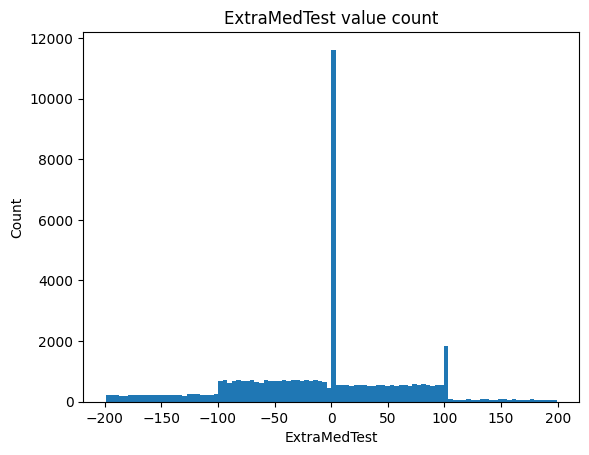

In [6]:
#ExtraMedTest value count
data_test['ExtraMedTest'].plot(kind='hist', bins=100, xlabel='ExtraMedTest', ylabel='Count', title='ExtraMedTest value count')

<Axes: xlabel='ExtraAlcoholTest', ylabel='Frequency'>

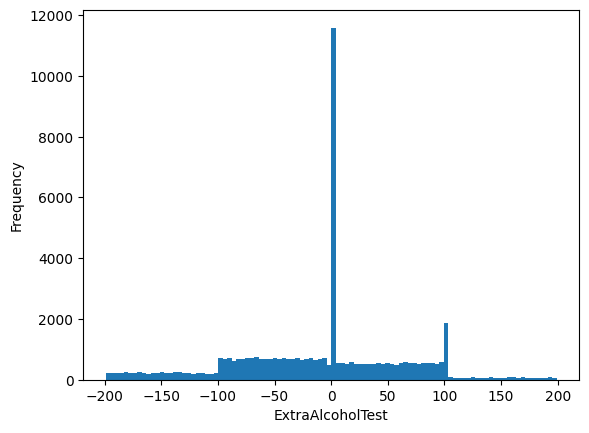

In [7]:
#ExtraAlcoholTest data distribution
data_test['ExtraAlcoholTest'].plot(kind='hist', bins=100, xlabel='ExtraAlcoholTest', ylabel='Frequency')

Despite a large distribution of both features in the given range of (-100, 100), the data still observe large falsely input data, espcially data in range (-200, -100). Hence, we need to reduce the data to our desired range

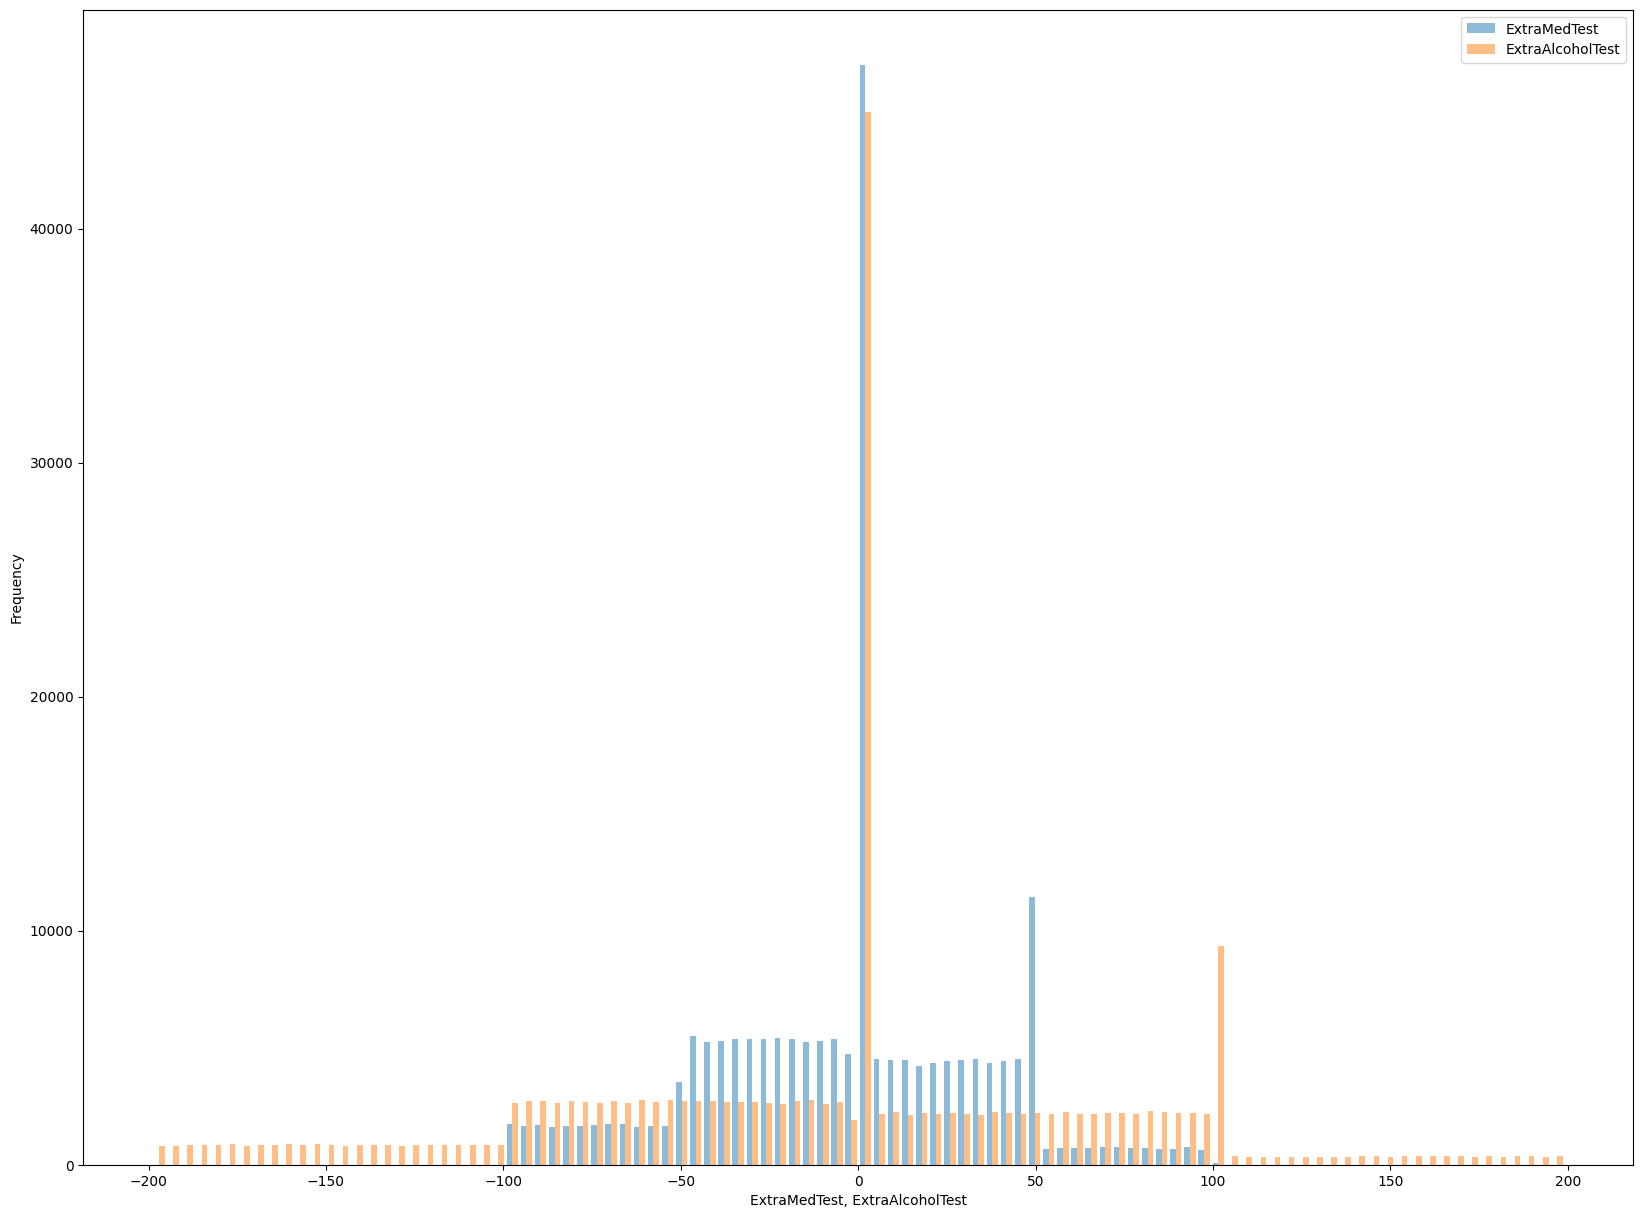

In [8]:
data_model['ExtraMedTest'] = data_model['ExtraMedTest']/2
data_test['ExtraMedTest'] = data_test['ExtraMedTest']/2
plt.figure(figsize=(20, 15))
plt.hist(data_model[['ExtraMedTest', 'ExtraAlcoholTest']], bins=100, alpha=0.5, label=['ExtraMedTest', 'ExtraAlcoholTest'])
plt.xlabel('ExtraMedTest, ExtraAlcoholTest')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

###### BMI abnormality

First, we will plot to see the distribution of BMI in the dataset

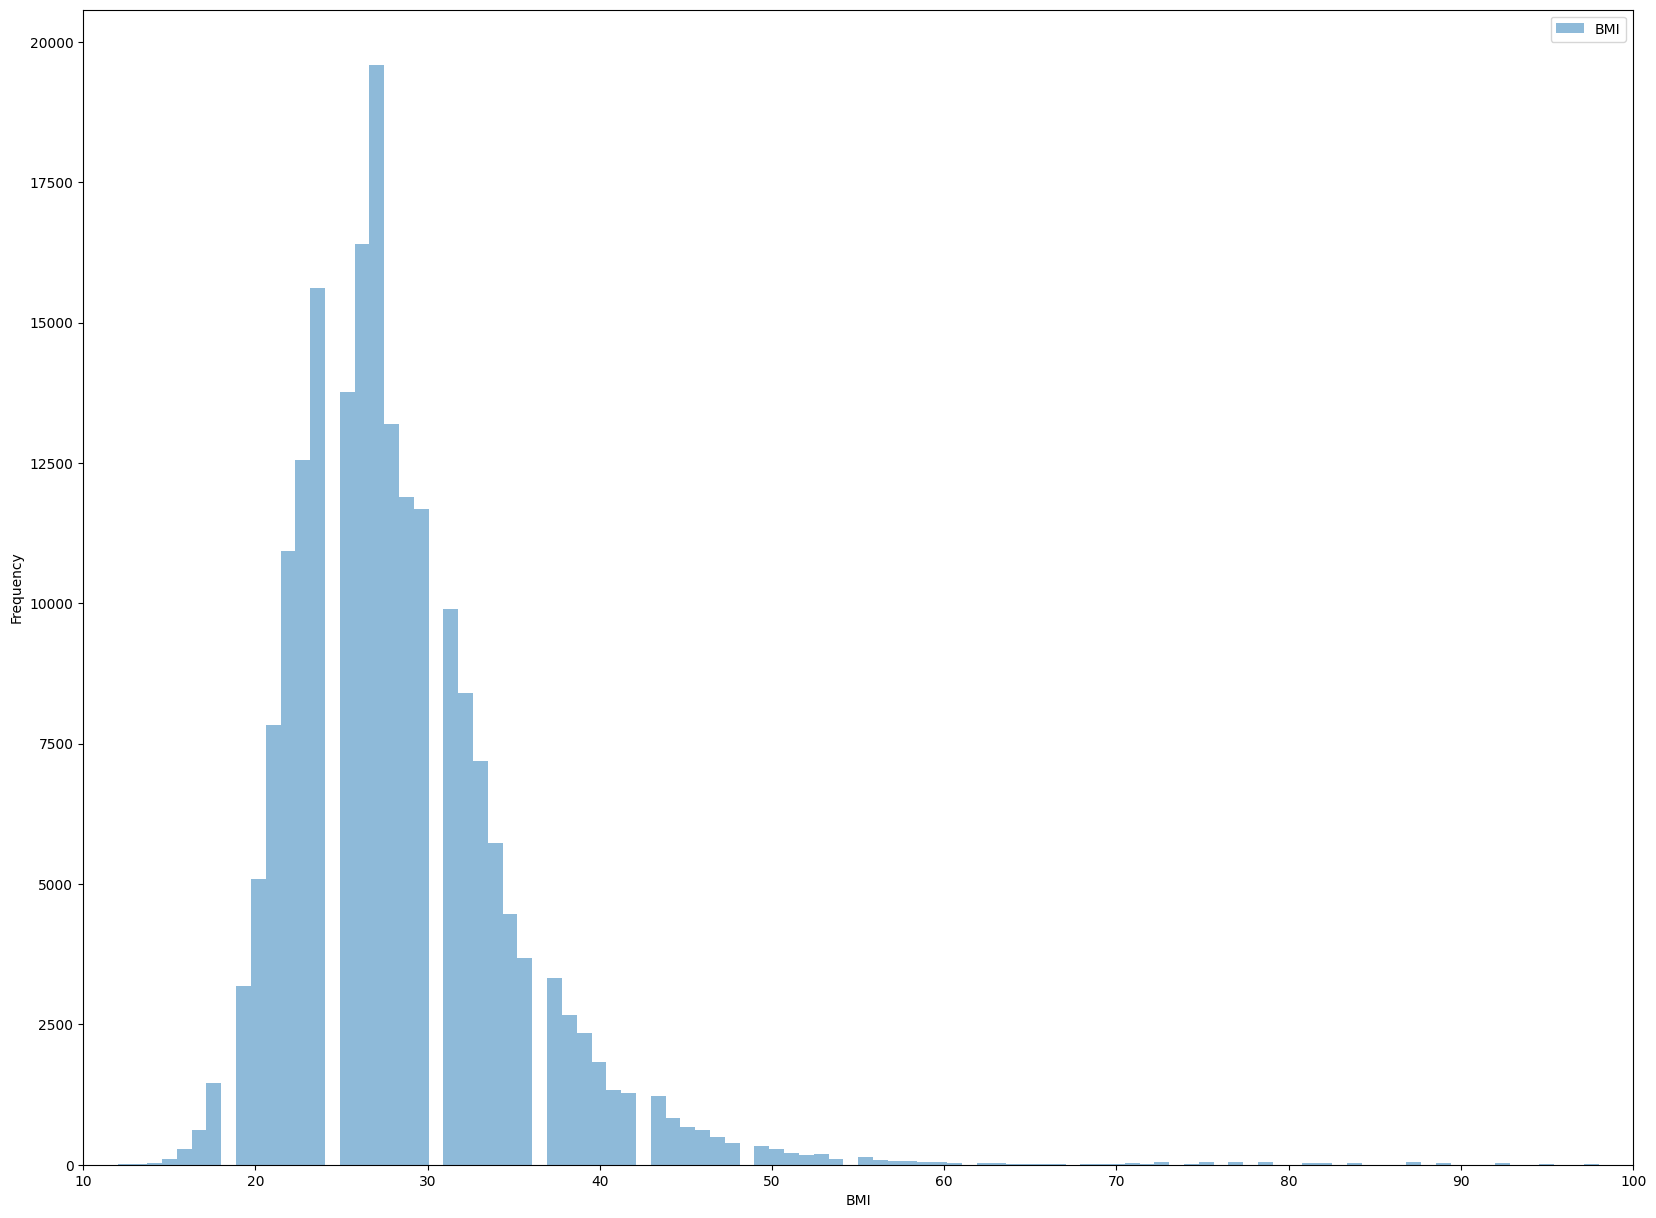

In [9]:
plt.figure(figsize=(20, 15))
plt.hist(data_model['BMI'], bins=100, alpha=0.5, label='BMI')
plt.xlim(left = 10, right = 100)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

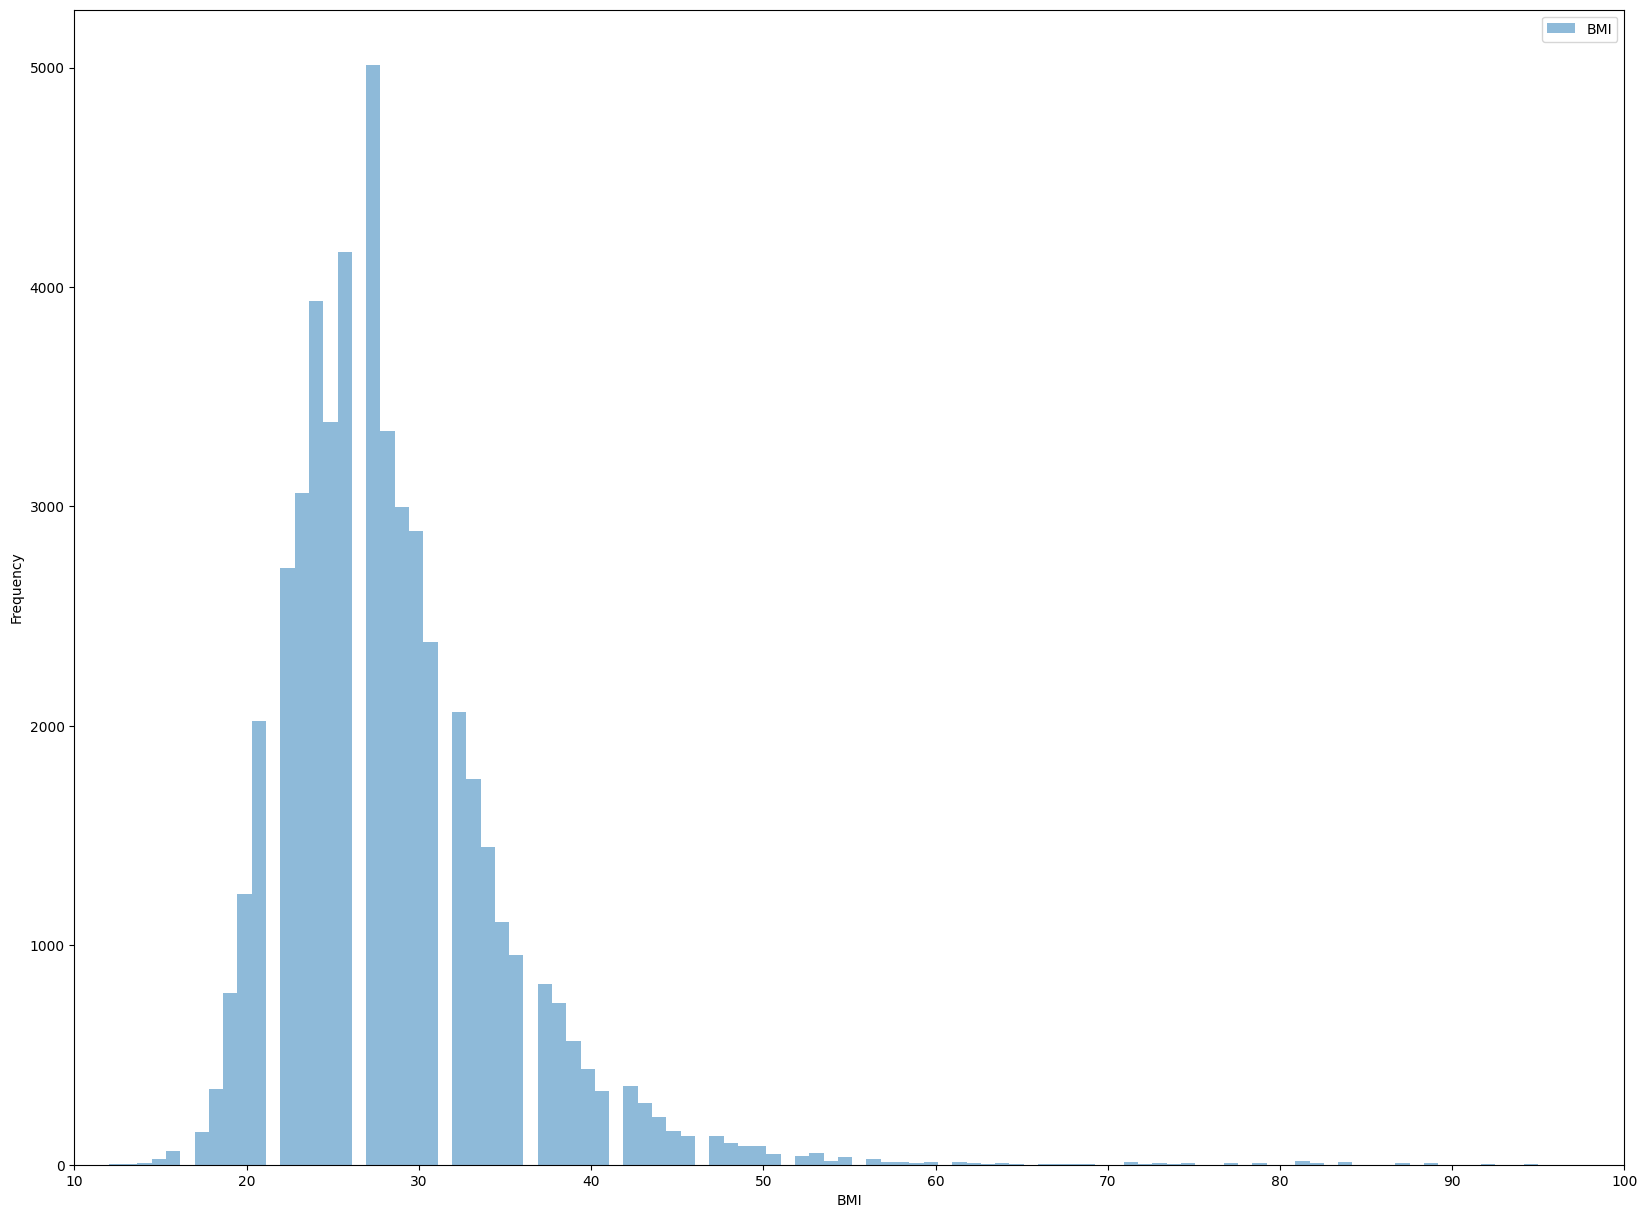

In [10]:
plt.figure(figsize=(20, 15))
plt.hist(data_test['BMI'], bins=100, alpha=0.5, label='BMI')
plt.xlim(left = 10, right = 100)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

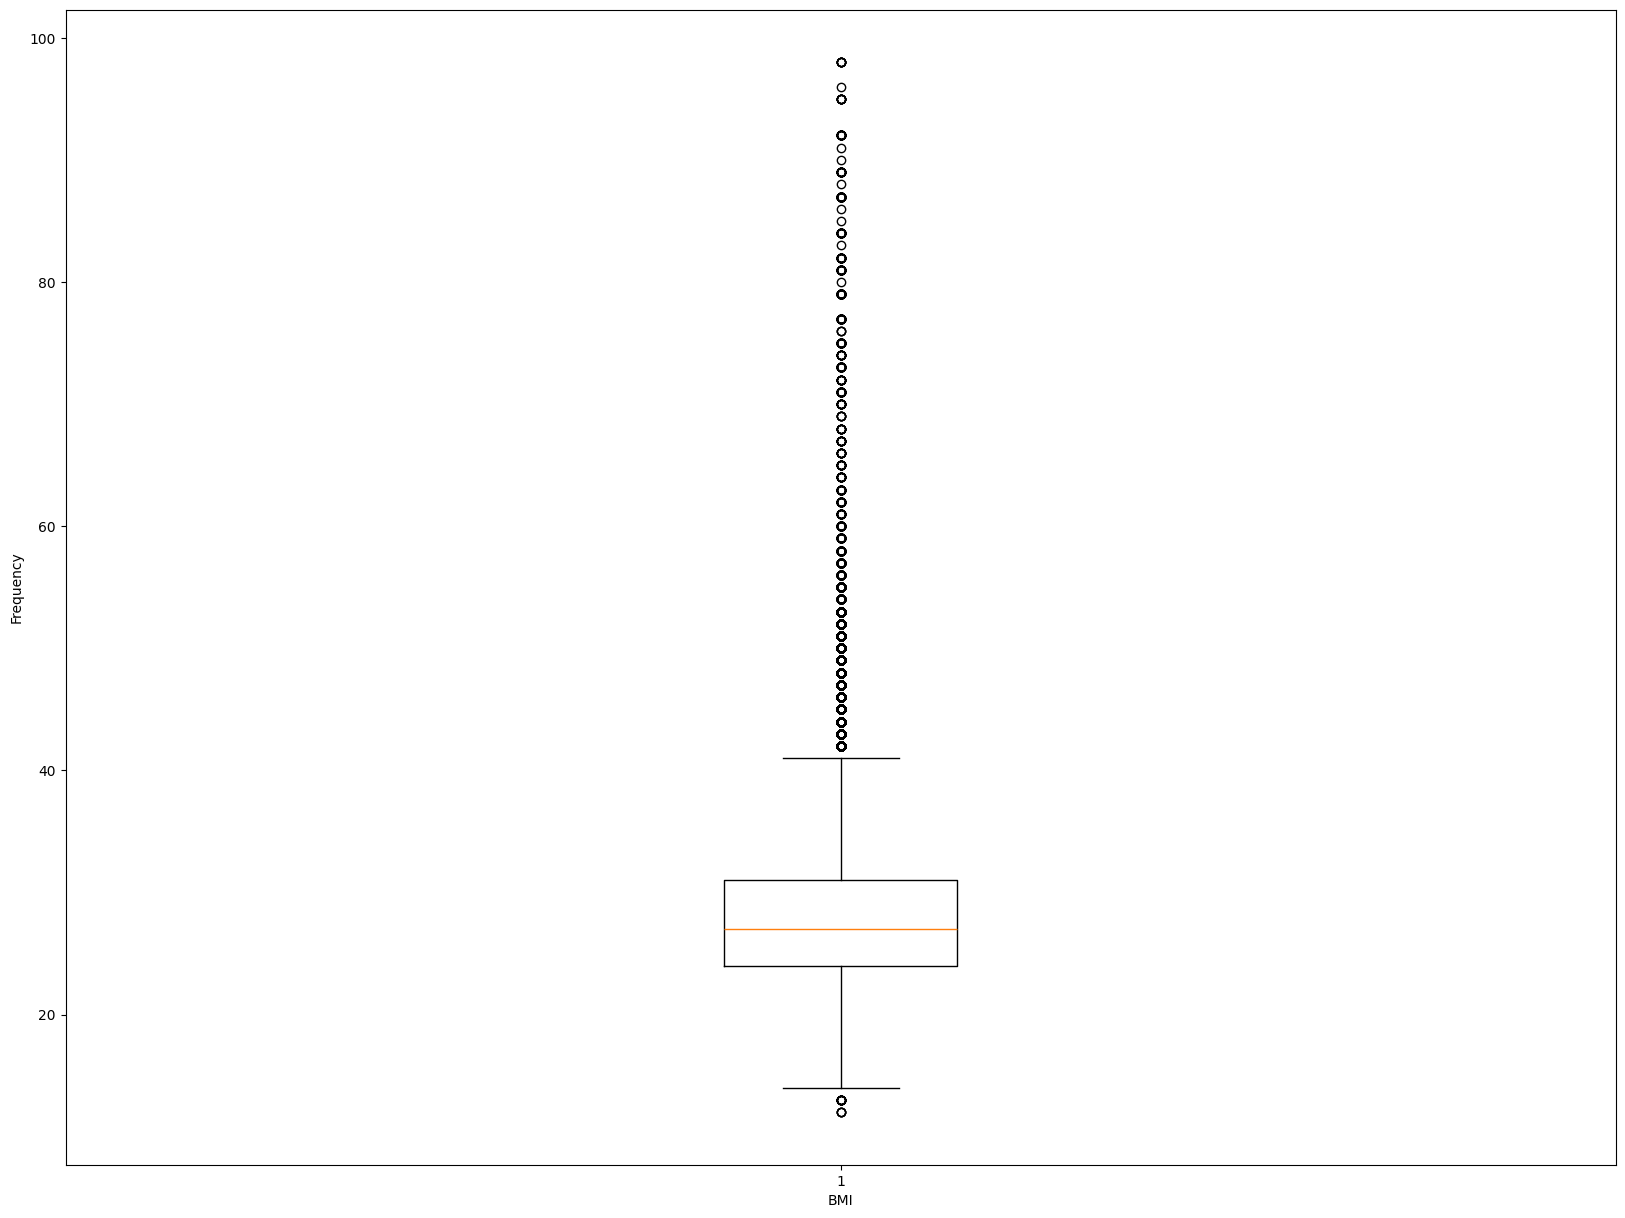

In [11]:
plt.figure(figsize=(20, 15))
plt.boxplot(data_model['BMI'])
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


#### 1.5. Checking for missing / null value

In [12]:
data_model.nunique()

HighBP                    2
HighChol                  2
CholCheck                 2
BMI                      83
Smoker                    2
Stroke                    2
HeartDiseaseorAttack      2
PhysActivity              2
Fruits                    2
Veggies                   2
HvyAlcoholConsump         2
AnyHealthcare             2
NoDocbcCost               2
GenHlth                   5
MentHlth                 31
PhysHlth                 31
DiffWalk                  2
Sex                       2
Age                      13
Education                 6
Income                    8
ExtraMedTest            399
ExtraAlcoholTest        399
Status                    2
dtype: int64

By investigating into unique value, with reference to the code book, we can determine that BMI, MenHlth, PhysHlth, ExtraMedTest and ExtraAlcoholTest are numerical features, and the remaining are categorical ones.

In [13]:
data_model.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64

The result show no null value from this dataset

In [14]:
print(data_model.duplicated().sum())
data_model_duplicated = data_model[data_model.duplicated()]
data_model_duplicated.head()

208


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
20272,0,0,1,23,0,0,0,1,1,1,0,1,0,1,0,0,0,0,9,6,8,0.0,0,0
22582,0,0,1,26,0,0,0,1,1,1,0,1,0,1,0,0,0,1,5,6,8,0.0,0,0
23322,0,0,1,22,0,0,0,1,1,1,0,1,0,2,0,0,0,0,3,6,8,0.0,0,0
23790,0,1,1,24,0,0,0,1,1,1,0,1,0,2,0,0,0,1,9,6,8,0.0,0,0
25615,0,0,1,23,0,0,0,1,1,1,0,1,0,1,0,0,0,0,6,6,8,0.0,0,0


There are 208 duplicated rows from the train dataset. In this case, we will drop all duplicated rows

In [15]:
data_model.drop_duplicates(inplace=True)
print(data_model.shape)
print(data_model.duplicated().sum())

(202736, 24)
0


Finally, we will observe the distribution of the whole training and testing dataset

array([[<Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoker'}>],
       [<Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>,
        <Axes: title={'center': 'Veggies'}>],
       [<Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>,
        <Axes: title={'center': 'MentHlth'}>],
       [<Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center'

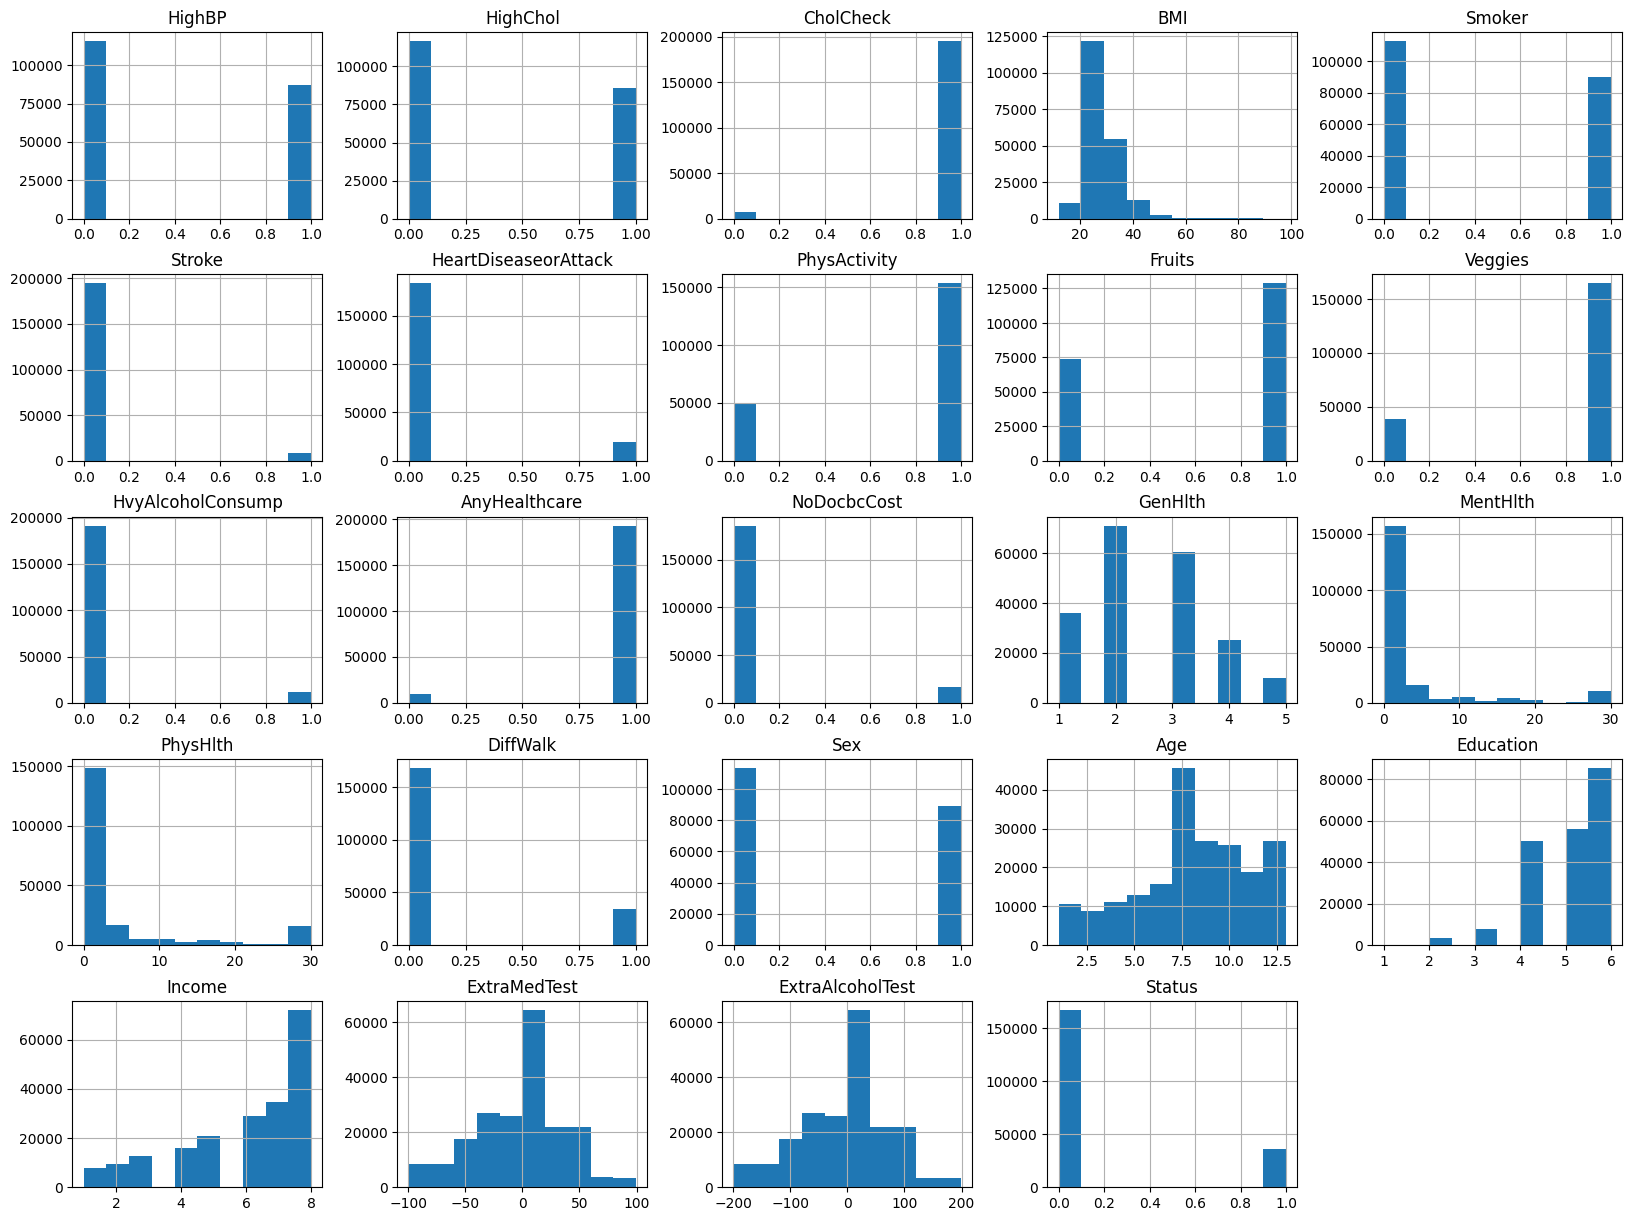

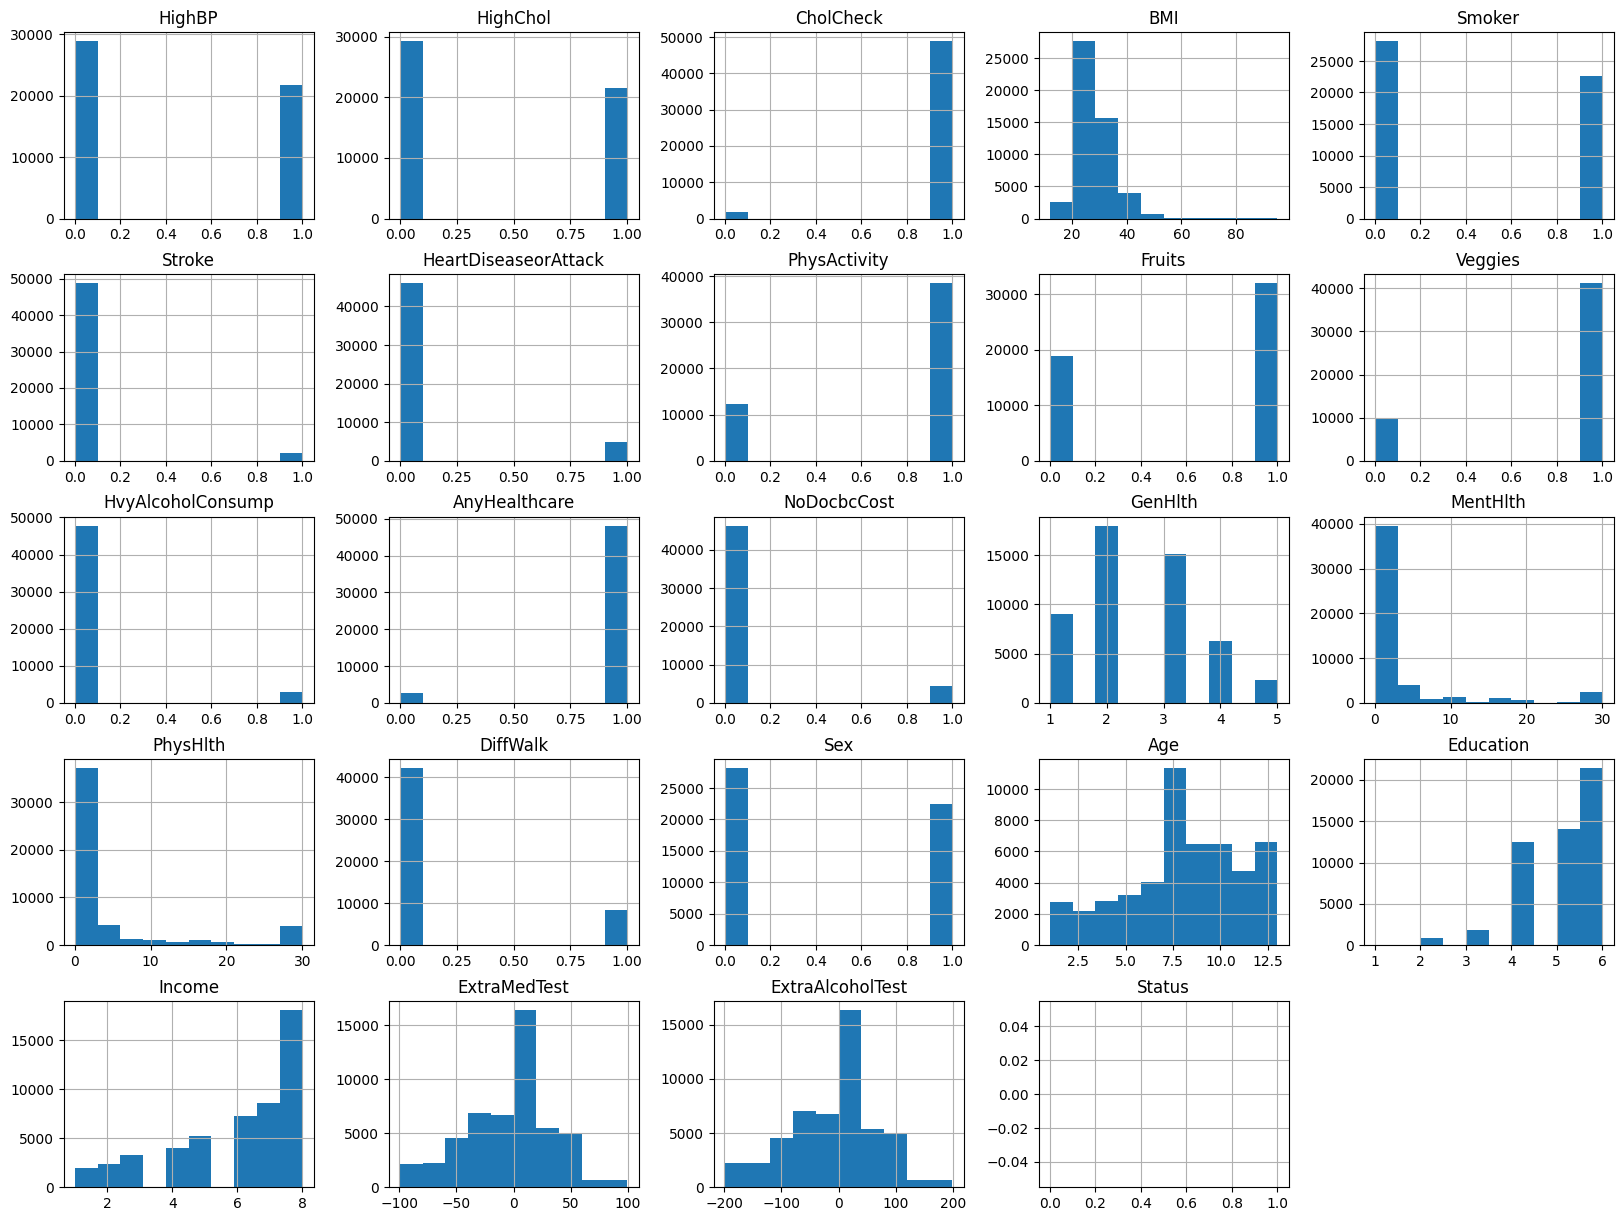

In [16]:
data_model.hist(figsize=(20, 15))
data_test.hist(figsize=(20, 15))

## 2. Univariate data analysis

### 2.1. Getting data distribution

#### 2.1.1. HighBP analysis

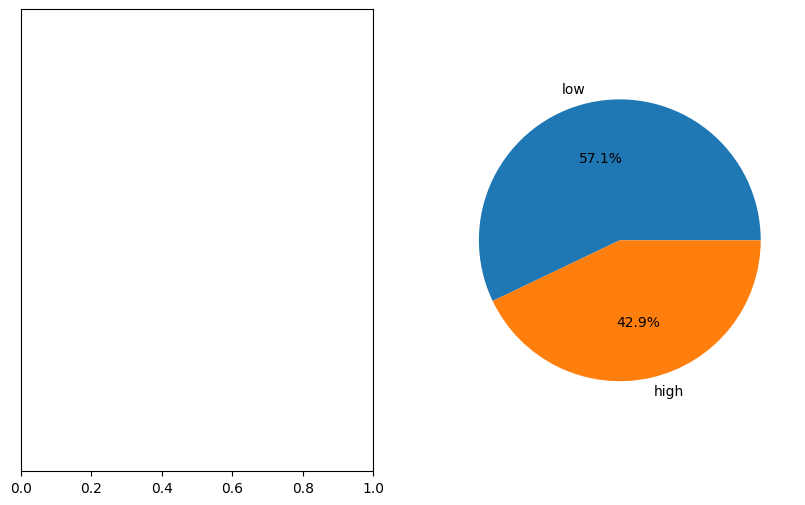

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharex=False, sharey=True)
# sns.barplot(x=data_model['HighBP'].value_counts().index, y=data_model['HighBP'].value_counts().values)

labels = ['low', 'high']
plt.pie(data_model['HighBP'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.show()

<Axes: xlabel='HighBP'>

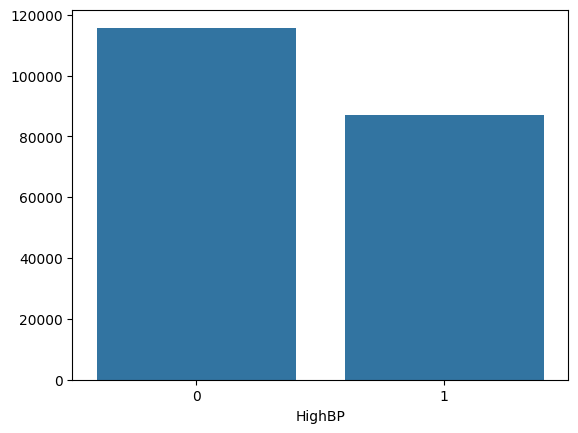

In [62]:
sns.barplot(x=data_model['HighBP'].value_counts().index, y=data_model['HighBP'].value_counts().values)